# Augmentations

## Geometric augmentations

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread('edge_flower.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h,w = img.shape[:2]

In [4]:
M = cv2.getRotationMatrix2D((w//2, h//2), 30, 1.0)
rotated = cv2.warpAffine(img, M, (w, h))

In [5]:
M = np.float32([[1, 0, 50], [0, 1, 30]])
translated = cv2.warpAffine(img, M, (w, h))

In [6]:
scaled = cv2.resize(img, None, fx=1.5, fy=1.5)

In [7]:
flip_h = cv2.flip(img, 1)   # horizontal
flip_v = cv2.flip(img, 0)   # vertical

In [8]:
cropped = img[100:300, 150:350]

In [9]:
pts1 = np.float32([[50,50], [200,50], [50,200]])
pts2 = np.float32([[10,100], [200,50], [100,250]])

M = cv2.getAffineTransform(pts1, pts2)
affine = cv2.warpAffine(img, M, (w, h))

In [10]:
pts1 = np.float32([[0,0], [w,0], [0,h], [w,h]])
pts2 = np.float32([[50,50], [w-50,0], [0,h], [w,h-50]])

M = cv2.getPerspectiveTransform(pts1, pts2)
perspective = cv2.warpPerspective(img, M, (w, h))

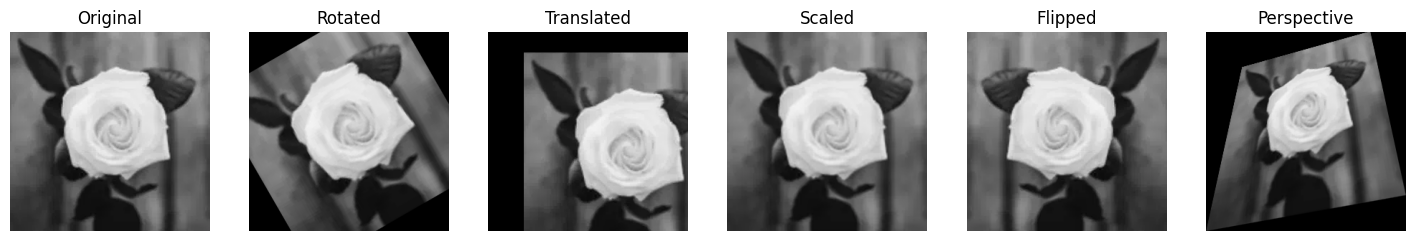

In [11]:
plt.figure(figsize=[18,5])
plt.subplot(161); plt.imshow(img); plt.title('Original'); plt.axis('off')
plt.subplot(162); plt.imshow(rotated); plt.title('Rotated'); plt.axis('off')
plt.subplot(163); plt.imshow(translated); plt.title('Translated'); plt.axis('off')
plt.subplot(164); plt.imshow(scaled); plt.title('Scaled'); plt.axis('off')
plt.subplot(165); plt.imshow(flip_h); plt.title('Flipped'); plt.axis('off')
plt.subplot(166); plt.imshow(perspective); plt.title('Perspective'); plt.axis('off')
plt.show()

## Brightness and Contrast

In [14]:
brighter = cv2.convertScaleAbs(img, alpha=1.0, beta=40)
darker   = cv2.convertScaleAbs(img, alpha=1.0, beta=-40)

high_contrast = cv2.convertScaleAbs(img, alpha=1.5, beta=0)
low_contrast  = cv2.convertScaleAbs(img, alpha=0.6, beta=0)

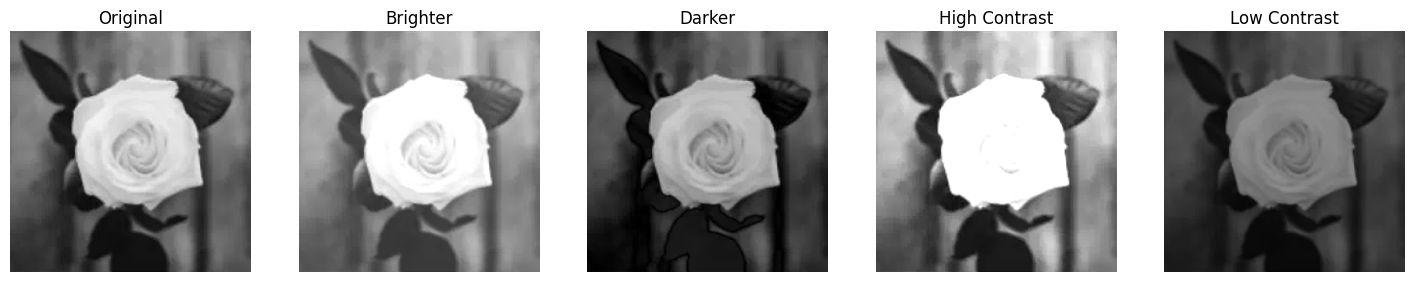

In [16]:
plt.figure(figsize=[18,5])
plt.subplot(151); plt.imshow(img); plt.title('Original'); plt.axis('off')
plt.subplot(152); plt.imshow(brighter); plt.title('Brighter'); plt.axis('off')
plt.subplot(153); plt.imshow(darker); plt.title('Darker'); plt.axis('off')
plt.subplot(154); plt.imshow(high_contrast); plt.title('High Contrast'); plt.axis('off')
plt.subplot(155); plt.imshow(low_contrast); plt.title('Low Contrast'); plt.axis('off')
plt.show()

## Synthetic Noise

In [17]:
noise = np.random.normal(0, 25, img.shape)
gaussian = img + noise
gaussian = np.clip(gaussian, 0, 255).astype(np.uint8)

In [18]:
sp = img.copy()
prob = 0.02

rand = np.random.rand(*img.shape[:2])
sp[rand < prob/2] = 0
sp[rand > 1 - prob/2] = 255

In [19]:
noise = np.random.randn(*img.shape)
speckle = img + img * noise * 0.2
speckle = np.clip(speckle, 0, 255).astype(np.uint8)

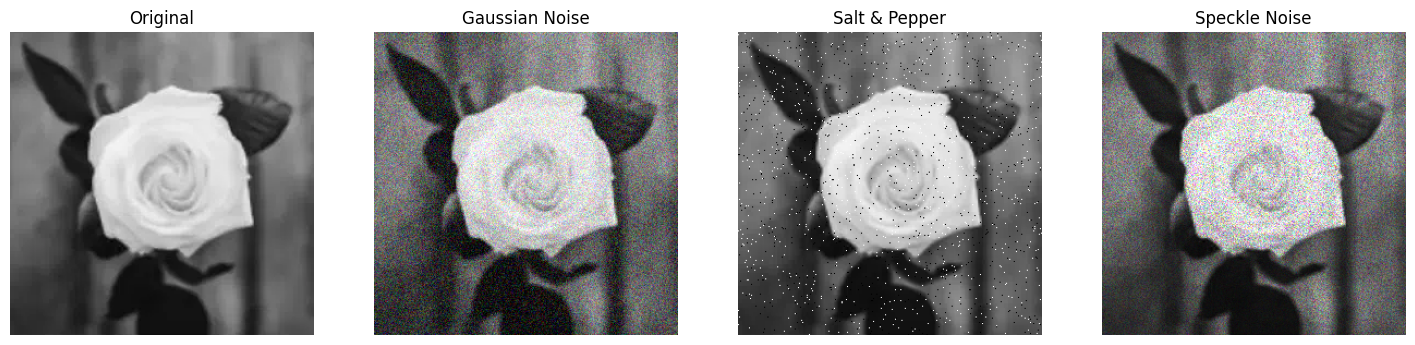

In [20]:
plt.figure(figsize=[18,5])
plt.subplot(141); plt.imshow(img, cmap='gray'); plt.title('Original'); plt.axis('off')
plt.subplot(142); plt.imshow(gaussian, cmap='gray'); plt.title('Gaussian Noise'); plt.axis('off')
plt.subplot(143); plt.imshow(sp, cmap='gray'); plt.title('Salt & Pepper'); plt.axis('off')
plt.subplot(144); plt.imshow(speckle, cmap='gray'); plt.title('Speckle Noise'); plt.axis('off')
plt.show()

## Combining with deep learning augmentations

In [22]:
img = cv2.imread('edge_flower.png')
img = cv2.resize(img, (224,224))
img = cv2.GaussianBlur(img, (5,5), 0)

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)